# Definition 

For naturals $1 \leq i \leq n$,$1 \leq j \leq n$ let be $K_{i j}: S \times S \rightarrow R$ kernels. 


Consider the kernel 
$$\mathcal K : S \times S \rightarrow R^{n \times s}$$
$$\mathcal K(x,y) = (k_{i,j}(x,y))_{i,j}.$$

Using [Tensor contraction](https://en.wikipedia.org/wiki/Tensor_contraction) we can define a dot product.  

(So we could have ridge regression). 

In [1]:
import numpy as np

# Define the tensors A and B
A = np.array([[[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12]],

              [[13, 14, 15, 16],
               [17, 18, 19, 20],
               [21, 22, 23, 24]]])

B = np.array([[[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12]],

              [[13, 14, 15, 16],
               [17, 18, 19, 20],
               [21, 22, 23, 24]]])

# Perform the contraction product

n, m ,l = A.shape
C = 0.0
for i in range(n):
    for j in range(m):
        for k in range(l):
            C += A[i, j, k] * B[i, j, k]

# Print the result
print(C)

4900.0


In [2]:

A = np.array([[[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12]],
              [[13, 14, 15, 16],
               [17, 18, 19, 20],
               [21, 22, 23, 24]]])

A[A < 3] = 0
A[A >= 3] = 1

print(A)


[[[0 0 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]


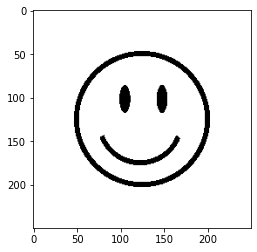

Balance  (array([-1,  1]), array([ 4099, 58401]))
Tamaño:  250  x  250


In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
image_path = 'imgs/10-kernel/smile.jpg'
image = Image.open(image_path)

reduce_factor = 4
new_width = 250#image.width // reduce_factor
new_height = 250#image.height // reduce_factor

# Reducir el tamaño de la imagen
resized_image = image.resize((new_width, new_height))

# Convert the image to grayscale
image_bw = resized_image.convert('L')
img_matrix = np.array(image_bw, dtype=int)
# binarize 
binarize_matrix = np.copy(img_matrix)
binarize_matrix[binarize_matrix < 112] = -1
binarize_matrix[binarize_matrix >= 112] = 1
plt.imshow(binarize_matrix, cmap='gray')
plt.show()

print('Balance ', np.unique(binarize_matrix, return_counts=True))
tam_x, tam_y = binarize_matrix.shape
print('Tamaño: ', tam_x, ' x ', tam_y)

# Ideal function
def f(x,y): return binarize_matrix[x,y]



In [4]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = np.array([[i,j] for i in range(0,tam_x) for j in range(0, tam_y)])
y = np.array(list(map(lambda v:f(*v),  X)))

print('Clases antes del remuestreo')
print(np.unique(y, return_counts=True))

# Sobremuestreo
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X, y)

print("Clases después del sobremuestreo:")
print(np.unique(y_over, return_counts=True))

# Submuestreo
under_sampler = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = under_sampler.fit_resample(X, y)

print("Clases después del submuestreo:")
print(np.unique(y_balanced, return_counts=True))


Clases antes del remuestreo
(array([-1,  1]), array([ 4099, 58401]))
Clases después del sobremuestreo:
(array([-1,  1]), array([58401, 58401]))
Clases después del submuestreo:
(array([-1,  1]), array([4099, 4099]))


# submuestreo 

In [8]:
from sklearn.model_selection import train_test_split

X_ = X_balanced
y_ = y_balanced
data_train, data_test, labels_train, labels_test = train_test_split(X_, y_, test_size=0.40, random_state=42, shuffle=True)

Training linear model
(array([-1,  1]), array([38365, 24135]))


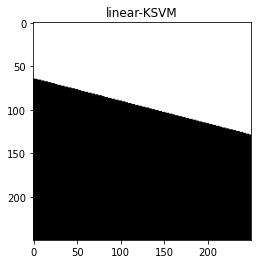

Training poly model
(array([-1,  1]), array([34748, 27752]))


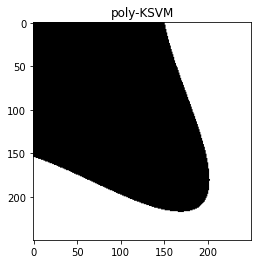

Training rbf model
(array([-1,  1]), array([24024, 38476]))


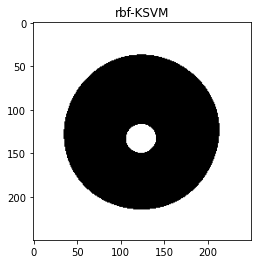

Training sigmoid model
(array([-1,  1]), array([29625, 32875]))


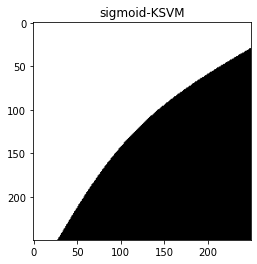

In [6]:
from sklearn import svm

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    print(f'Training {kernel} model')
    clf = svm.SVC(kernel=kernel)
    clf.fit(data_train, labels_train)
    #clf.fit(X, y)
    y_predict = clf.predict(X)
    print(np.unique(y_predict, return_counts=True))
    rescostructed_image = y_predict.reshape((tam_x, tam_y))
    plt.title(f'{kernel}-KSVM')
    plt.imshow(rescostructed_image, cmap='gray')
    plt.show()


(array([-1,  1]), array([29478, 33022]))


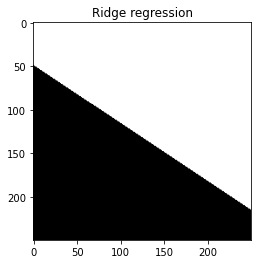

In [11]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import KernelRidge

clf = RidgeClassifier(alpha=1.0)
clf.fit(X_, y_)
clf.fit(data_train, labels_train)
#clf.fit(X, y)
y_predict = clf.predict(X)
print(np.unique(y_predict, return_counts=True))
rescostructed_image = y_predict.reshape((tam_x, tam_y))
plt.title(f'Ridge regression')
plt.imshow(rescostructed_image, cmap='gray')
plt.show()

(array([-1,  1]), array([30810, 31690]))


/Users/blancacanocamarero/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


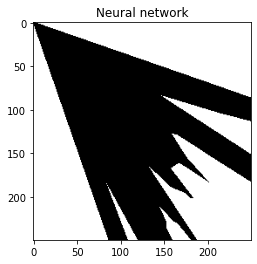

In [16]:
from sklearn.neural_network import MLPClassifier
hidden_sizes = (100, 100)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                    max_iter=500,
                    hidden_layer_sizes= hidden_sizes, random_state=1)
clf.fit(data_train, labels_train)

y_predict = clf.predict(X)
print(np.unique(y_predict, return_counts=True))
rescostructed_image = y_predict.reshape((tam_x, tam_y))
plt.title(f'Neural network')
plt.imshow(rescostructed_image, cmap='gray')
plt.show()

(array([-1,  1]), array([ 1451, 61049]))


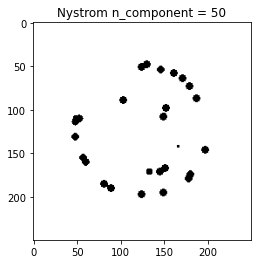

(array([-1,  1]), array([ 2034, 60466]))


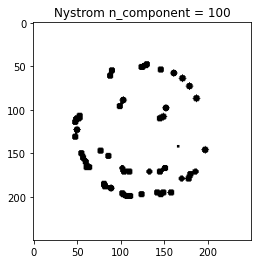

(array([-1,  1]), array([ 3579, 58921]))


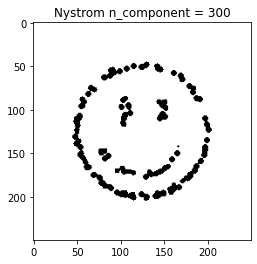

(array([-1,  1]), array([ 4008, 58492]))


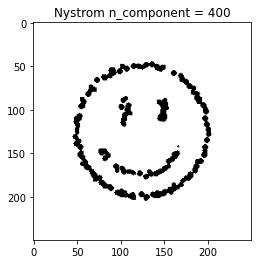

In [21]:

from sklearn.kernel_approximation import Nystroem

for n in [50, 100, 300, 400]:
    clf = svm.LinearSVC()
    feature_map_nystroem = Nystroem(gamma=.2, random_state=1, n_components= n)
    data_transformed = feature_map_nystroem.fit_transform(X_)
    clf.fit(data_transformed, y_)

    y_predict = clf.predict(feature_map_nystroem.transform(X))
    print(np.unique(y_predict, return_counts=True))
    rescostructed_image = y_predict.reshape((tam_x, tam_y))
    plt.title(f'Nystrom n_component = {n}')
    plt.imshow(rescostructed_image, cmap='gray')
    plt.show()


**Could we improve the results?**

- RBF kernel have $\gamma$ hyperparameter which is crucial. 
- Why not combine two or more? 

# Definition 

For naturals $1 \leq i \leq n$,$1 \leq j \leq n$ let be $K_{i j}: S \times S \rightarrow R$ kernels. 


Consider the kernel 
$$\mathcal K : S \times S \rightarrow R^{n \times s}$$
$$\mathcal K(x,y) = (k_{i,j}(x,y))_{i,j}.$$

Using [Tensor contraction](https://en.wikipedia.org/wiki/Tensor_contraction) we can define a dot product.  

(So we could have ridge regression). 

## Could we compute their eigenvalues? 

Article: 

[Lim, L. H. (2006). Singular Values and Eigenvalues of Tensors: A Variational Approach.](https://arxiv.org/abs/math/0607648) arXiv preprint math/0607648.


### Introduction: Eigenvalues and eigenvectors of a symmetric matrix

Eigenvalues and eigenvectors of a symmetric matrix $A$ 
are the critical values and critical points of its Rayleigh quotient: 

$$
\frac{x^T A x}{\|x\|^2_2}
$$

Or equivalently, the critical values and points of the quadratic form $x^T A x$
constrained to vectors with unit.


If $K: R^n \times R \longrightarrow R$ is the  associated Lagrangian with Lagrange multiplier $\lambda$,

$$
L(x, \lambda)
= 
x^T A x
- 
\lambda \left( \| x\|^2_2 -1\right),
$$

then the vanishing of $\nabla L$ at a critical point $(x_c, \lambda_c) \in R^n \times \R$ yields the familiar defining condition for eigenpairs.  

### Generalization for tensors of order $k \geq 3$

-  Replace bilinear functional $x^T A y$ to a multilinear functional. 
-  The constrained critical values/points then yield a notion of singual values/vectors for order-$k$ tensors. 


####  Tensors and multilinear functionals
Let  $K$ be an order-k tensor $K \in R^{d_1 \times \cdots d_k}$. 

The **covariant multi-linear matrix multiplication** of K by matrices 
$M_1 \in R^{d_1 \times s_1}, \ldots, M_k \in R^{d_k \times s_k}$ 
is defined by

$$
A(M_1, \ldots, M_k)
= 
\sum^{d_1}_{j_1} \cdots \sum^{d_k}_{j_k} 
k_{j_i \ldots j_k}
 m_{j_i i_1}^{(1)}
 \cdots 
  m_{j_i i_1}^{(k)},
$$
the results lives in $R^{s_1 \times \ldots \times s_k}$. 

## How to work 

1. Compute  $\mathcal K$.
2. 


In [17]:
import numpy as np
from scipy.linalg import eigh

# Define the rank-3 tensor T
T = np.array([[[1, 2, 3],
               [2, 4, 5],
               [3, 5, 6]],
              [[7, 8, 9],
               [8, 10, 11],
               [9, 11, 12]],
              [[13, 14, 15],
               [14, 16, 17],
               [15, 17, 18]]])

# Flatten the tensor into a symmetric matrix
n = T.shape[0]
M = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        M[i, j] = np.sum(T[i] * T[j])

# Compute the eigenvalues and eigenvectors of the symmetric matrix
eigenvalues, eigenvectors = eigh(M)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[3.10910533e+03 1.38946724e+01 1.75175820e-13]

Eigenvectors:
[[-0.19477265  0.89185029  0.40824829]
 [-0.51482469  0.26132139 -0.81649658]
 [-0.83487673 -0.3692075   0.40824829]]


# Sobremuestreo


(array([-1,  1]), array([21158, 41342]))


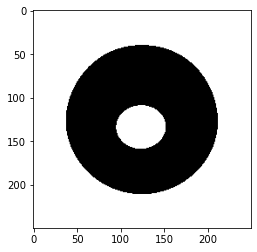

In [7]:
X_ = X_over
y_ = y_over
# split
data_train, data_test, labels_train, labels_test = train_test_split(X_, y_, test_size=0.80, random_state=42, shuffle=True)
# train
clf = svm.SVC(kernel='rbf')
clf.fit(data_train, labels_train)
# image prediction and show
y_predict = clf.predict(X)
print(np.unique(y_predict, return_counts=True))
rescostructed_image = y_predict.reshape((tam_x, tam_y))
plt.imshow(rescostructed_image, cmap='gray')
plt.show()